In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CharlesPrado23/Bootcamp2oSemestre2021/main/Semana7/Position_Salaries.csv")

In [ ]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [ ]:
X = df.Level.values
y = df.Salary.values

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

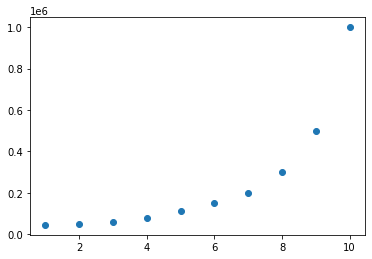

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [ ]:
LR = LinearRegression()
LR.fit(X.reshape(-1,1),y) #reshape - se ele é linha vira coluna; se é coluna vira linha.
LR.score(X.reshape(-1,1),y)
#em 66,90% dos meus dados de saída, são diretamente ligados aos meus dados de entrada

0.6690412331929895

In [ ]:
LR.coef_

array([80878.78787879])

In [ ]:
#Se eu quiser desenhar a equação da reta: 
linear_curve = []
for k in range(12):
  z = LR.intercept_ + LR.coef_[0]*k 
  linear_curve.append(z)

In [ ]:
linear_curve = np.array(linear_curve)

In [ ]:
#quadrático: 2 -> X => X^2
#cúbico: 3 -> X => X^2 + X^3
poly = PolynomialFeatures(2)
#poly.fit(X)
#poly.transform(X)
X_poly = poly.fit_transform(X.reshape(-1,1))
X_poly[0:5]
#y = a + bX + cX^2

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [ ]:
LR.fit(X_poly,y)
LR.score(X_poly,y)

0.9162082221443942

In [ ]:
LR.intercept_

232166.6666666664

In [ ]:
LR.coef_

array([      0.        , -132871.21212121,   19431.81818182])

In [ ]:
#estou gerando a curva
a = range(12)
quadratic_curve = []
for val in a: 
  z = LR.intercept_ + LR.coef_[1]*(val) + LR.coef_[2]*(val**2) 
  quadratic_curve.append(z)

In [ ]:
squadratic_curve = np.array(quadratic_curve) #transformando a lista num array

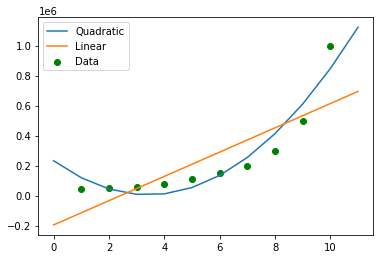

In [ ]:
plt.plot(quadratic_curve, label = 'Quadratic')
plt.plot(linear_curve, label='Linear')
plt.scatter(X,y,c='g',label='Data')
plt.legend()
plt.show()

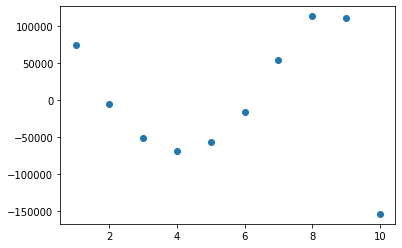

In [ ]:
Yhat = LR.predict(X_poly)
res = Yhat -y 
plt.scatter(X,res)